# NYC citibike data - 2023

## Import and concatenate data

In [2]:
# import libraries
import pandas as pd 
import numpy as np
import os 
import requests
import json
from datetime import datetime
import shutil # To export all files into a single csv folder
import matplotlib.pyplot as plt

### Export all csv files in one folder

In [3]:
# Define paths
source_folder = r"2023-citibike-tripdata"
destination_folder = r"2023-citibike-tripdata-csvs"  # Name of the new folder

# Create destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Loop through and copy .csv files
for name in os.listdir(source_folder):
    full_path = os.path.join(source_folder, name)

    if os.path.isdir(full_path):
        for file in os.listdir(full_path):
            if file.endswith('.csv'):
                source_file = os.path.join(full_path, file)
                destination_file = os.path.join(destination_folder, file)

                # Copy the CSV file to the new folder
                shutil.copy2(source_file, destination_file)

print("All CSV files have been copied to {destination_folder}")

All CSV files have been copied to {destination_folder}


In [4]:
# Step 1: Create a list with all files in the folder using a list compehension
folderpath = r"2023-citibike-tripdata-csvs" # make sure to put the 'r' in front
filepaths  = [os.path.join(folderpath, name) for name in os.listdir(folderpath)]

In [5]:
filepaths

['2023-citibike-tripdata-csvs/202312-citibike-tripdata_2.csv',
 '2023-citibike-tripdata-csvs/202301-citibike-tripdata_1.csv',
 '2023-citibike-tripdata-csvs/202312-citibike-tripdata_3.csv',
 '2023-citibike-tripdata-csvs/202305-citibike-tripdata_4.csv',
 '2023-citibike-tripdata-csvs/202312-citibike-tripdata_1.csv',
 '2023-citibike-tripdata-csvs/202301-citibike-tripdata_2.csv',
 '2023-citibike-tripdata-csvs/202305-citibike-tripdata_1.csv',
 '2023-citibike-tripdata-csvs/202305-citibike-tripdata_2.csv',
 '2023-citibike-tripdata-csvs/202305-citibike-tripdata_3.csv',
 '2023-citibike-tripdata-csvs/202306-citibike-tripdata_2.csv',
 '2023-citibike-tripdata-csvs/202309-citibike-tripdata_3.csv',
 '2023-citibike-tripdata-csvs/202309-citibike-tripdata_2.csv',
 '2023-citibike-tripdata-csvs/202306-citibike-tripdata_3.csv',
 '2023-citibike-tripdata-csvs/202306-citibike-tripdata_1.csv',
 '2023-citibike-tripdata-csvs/202309-citibike-tripdata_1.csv',
 '2023-citibike-tripdata-csvs/202306-citibike-tripdata_

In [6]:
# Step 2: Read and concatenate all files simultaneously using generator
# Load all CSVs with low_memory=False
df = pd.concat((pd.read_csv(f, low_memory=False) for f in filepaths), ignore_index=True)

# Check the first few rows
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,5772778972800B87,electric_bike,2023-12-20 06:18:04.187,2023-12-20 06:24:50.461,W 41 St & 8 Ave,6602.03,Madison Ave & E 26 St,6131.12,40.756330,-73.989260,40.742685,-73.986713,member
1,32DD834BEA2ABA5B,classic_bike,2023-12-21 16:15:52.308,2023-12-21 16:21:22.124,46 Ave & 5 St,6286.02,44 Dr & Jackson Ave,6352.01,40.747310,-73.954510,40.747182,-73.943264,member
2,3B6B1AA2B94A01D1,classic_bike,2023-12-07 11:49:31.277,2023-12-07 11:56:07.264,46 Ave & 5 St,6286.02,44 Dr & Jackson Ave,6352.01,40.747310,-73.954510,40.747182,-73.943264,member
3,A8F4C66161031B63,electric_bike,2023-12-26 06:17:43.385,2023-12-26 06:24:11.386,W 41 St & 8 Ave,6602.03,Madison Ave & E 26 St,6131.12,40.756456,-73.989694,40.742685,-73.986713,member
4,A6176AFE373FB4C8,electric_bike,2023-12-21 06:58:24.078,2023-12-21 07:04:17.045,E 53 St & 3 Ave,6617.02,1 Ave & E 68 St,6822.09,40.757470,-73.969427,40.765005,-73.958185,member


In [7]:
df.shape

(35107030, 13)

In [8]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [9]:
df.tail()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
35107025,69262CB4F1D8BDC8,classic_bike,2023-08-15 12:51:41.402,2023-08-15 13:05:12.615,Carroll St & 5 Ave,4060.09,4 Ave & 26 St,3596.04,40.675162,-73.981483,40.660079,-73.998633,member
35107026,4B3DFAD8C863B15A,classic_bike,2023-08-28 19:38:25.187,2023-08-28 19:44:06.228,10 St & 4 Ave,3882.05,4 Ave & 26 St,3596.04,40.669674,-73.988989,40.660079,-73.998633,member
35107027,BCD23573C49BBD1F,classic_bike,2023-08-24 17:53:08.168,2023-08-24 18:09:37.356,Carroll St & 5 Ave,4060.09,Flatbush Ave & Ocean Ave,3704.04,40.675162,-73.981483,40.663657,-73.963014,member
35107028,BFD52DFF60F1D251,classic_bike,2023-08-17 18:37:24.995,2023-08-17 18:53:34.535,E 75 St & 3 Ave,6991.12,FDR Drive & E 35 St,6230.04,40.771129,-73.957723,40.744219,-73.971212,member
35107029,464594FDA2BD4397,electric_bike,2023-08-20 12:40:54.958,2023-08-20 13:02:14.279,Carroll St & 5 Ave,4060.09,Leonard St & Boerum St,5036.06,40.675224,-73.981665,40.705833,-73.946446,member


**Used "low_memory=False" for more stable solution for the messy real-world datasets!**

In [10]:
# Convert started_at to datetime
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

# Find the earliest and latest trip
print("Earliest trip:", df['started_at'].min())
print("Latest trip:", df['ended_at'].max())

Earliest trip: 2022-02-24 05:17:48.641000
Latest trip: 2023-12-31 23:59:57.057000


**It includes data from early 2022**

In [11]:
# Filter trips that started in 2023
df_2023 = df[df['started_at'].dt.year == 2023]

# Check again
print(df_2023['started_at'].min())
print(df_2023['ended_at'].max())

# Optional: drop the extra 'year_month' column if created earlier
#df_2023 = df_2023.drop(columns=['year_month'], errors='ignore')

2023-01-01 00:00:13.021000
2023-12-31 23:59:57.057000


In [12]:
df_2023.shape

(35106710, 13)

In [14]:
# Make a copy of filtered 2023 data
df_2023 = df[df['started_at'].dt.year == 2023].copy()

# Create a year-month column
df_2023['year_month'] = df_2023['started_at'].dt.to_period('M')

# Count trips per month
monthly_trips = df_2023.groupby('year_month').size()

# View
print(monthly_trips)

year_month
2023-01    1795329
2023-02    1696101
2023-03    2119314
2023-04    2749360
2023-05    3453576
2023-06    3451869
2023-07    3659372
2023-08    3964206
2023-09    3471658
2023-10    3724615
2023-11    2816850
2023-12    2204460
Freq: M, dtype: int64


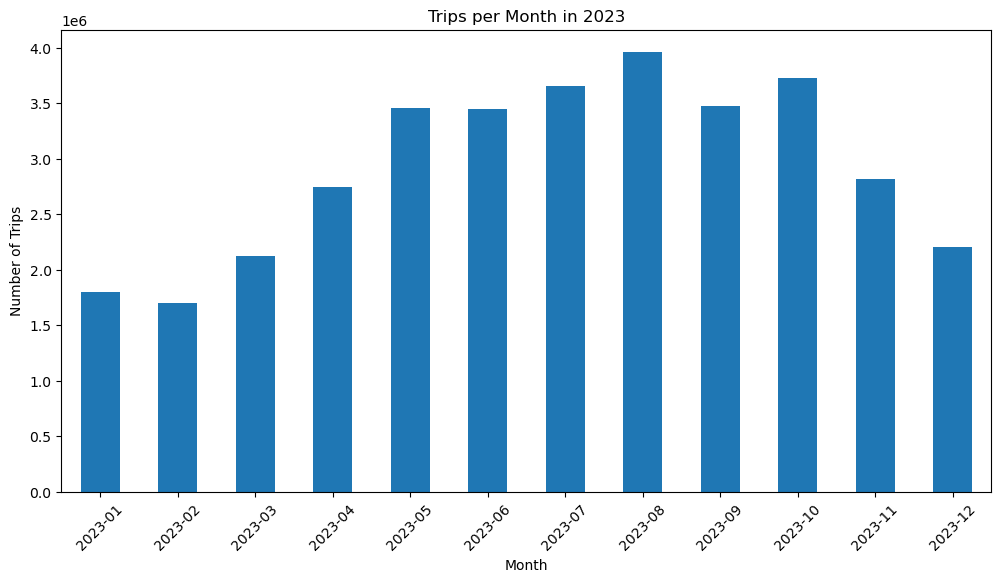

In [15]:
monthly_trips.plot(kind='bar', figsize=(12, 6))
plt.title('Trips per Month in 2023')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()

In [16]:
df_2023.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
year_month                 period[M]
dtype: object

In [17]:
df_2023.to_csv('citbike_2023.csv')

In [18]:
df_2023_updated = df_2023.drop(columns=['start_lat', 'start_lng', 'end_lat', 'end_lng'])

In [19]:
df_2023_updated.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
member_casual                 object
year_month                 period[M]
dtype: object

In [ ]:
df_2023_updated.to_csv('citbike_2023_cleaned.csv')

## Getting weather data using NOAA's API

In [21]:
# Step 1: Find the Station’s ID 
# GHCND:USW00014732

# Step 2: Define NOAA Token
Token = 'hyZLaVsWXkBoTHhTXSkGoXXwQHTtemLV'

In [22]:
# Step 3: Compile URL
r = requests.get('https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&datatypeid=TAVG&limit=1000&stationid=GHCND:USW00014732&startdate=2023-01-01&enddate=2023-12-31', headers={'token':Token})

In [23]:
# Store the Data in JSON Format
d = json.loads(r.text)

# Secure all items in the response that correspond to TAVG
avg_temps = [item for item in d['results'] if item['datatype']=='TAVG']

# Get only the date field from all average temperature readings
dates_temp = [item['date'] for item in avg_temps]

# Get the temperature from all average temperature readings
temps = [item['value'] for item in avg_temps]
temps

# Put the results in a dataframe
df_temp = pd.DataFrame()

# Get only date and cast it to date time; convert temperature from tenths of Celsius to normal Celsius
df_temp['date'] = [datetime.strptime(d, "%Y-%m-%dT%H:%M:%S") for d in dates_temp]
df_temp['avgTemp'] = [float(v)/10.0 for v in temps]

df_temp.tail()

,date,avgTemp
360,2023-12-27,6.7
361,2023-12-28,9.5
362,2023-12-29,9.8
363,2023-12-30,7.2
364,2023-12-31,5.4


In [24]:
df_temp.dtypes

date       datetime64[ns]
avgTemp           float64
dtype: object

### Merging the Data

In [27]:
# Merge the Data
df_2023_updated['started_at'] = pd.to_datetime(df_2023['started_at'])
df_temp['date'] = pd.to_datetime(df_temp['date'])

In [28]:
# Extract only date part
df_2023_updated['date'] = df_2023_updated['started_at'].dt.date
df_temp['date'] = df_temp['date'].dt.date

In [29]:
# Merge
bike_weather_2023 = pd.merge(df_2023_updated, df_temp, on='date', how='left', indicator=True)

In [30]:
# Preview
bike_weather_2023.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,year_month,date,avgTemp,_merge
0,5772778972800B87,electric_bike,2023-12-20 06:18:04.187,2023-12-20 06:24:50.461,W 41 St & 8 Ave,6602.03,Madison Ave & E 26 St,6131.12,member,2023-12,2023-12-20,2.3,both
1,32DD834BEA2ABA5B,classic_bike,2023-12-21 16:15:52.308,2023-12-21 16:21:22.124,46 Ave & 5 St,6286.02,44 Dr & Jackson Ave,6352.01,member,2023-12,2023-12-21,3.6,both
2,3B6B1AA2B94A01D1,classic_bike,2023-12-07 11:49:31.277,2023-12-07 11:56:07.264,46 Ave & 5 St,6286.02,44 Dr & Jackson Ave,6352.01,member,2023-12,2023-12-07,2.1,both
3,A8F4C66161031B63,electric_bike,2023-12-26 06:17:43.385,2023-12-26 06:24:11.386,W 41 St & 8 Ave,6602.03,Madison Ave & E 26 St,6131.12,member,2023-12,2023-12-26,7.1,both
4,A6176AFE373FB4C8,electric_bike,2023-12-21 06:58:24.078,2023-12-21 07:04:17.045,E 53 St & 3 Ave,6617.02,1 Ave & E 68 St,6822.09,member,2023-12,2023-12-21,3.6,both


In [31]:
bike_weather_2023.shape

(35106710, 13)

In [32]:
bike_weather_2023['_merge'].value_counts(dropna = False)

_merge
both          35106710
left_only            0
right_only           0
Name: count, dtype: int64

In [33]:
bike_weather_2023.tail()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,year_month,date,avgTemp,_merge
35106705,69262CB4F1D8BDC8,classic_bike,2023-08-15 12:51:41.402,2023-08-15 13:05:12.615,Carroll St & 5 Ave,4060.09,4 Ave & 26 St,3596.04,member,2023-08,2023-08-15,23.9,both
35106706,4B3DFAD8C863B15A,classic_bike,2023-08-28 19:38:25.187,2023-08-28 19:44:06.228,10 St & 4 Ave,3882.05,4 Ave & 26 St,3596.04,member,2023-08,2023-08-28,23.3,both
35106707,BCD23573C49BBD1F,classic_bike,2023-08-24 17:53:08.168,2023-08-24 18:09:37.356,Carroll St & 5 Ave,4060.09,Flatbush Ave & Ocean Ave,3704.04,member,2023-08,2023-08-24,22.3,both
35106708,BFD52DFF60F1D251,classic_bike,2023-08-17 18:37:24.995,2023-08-17 18:53:34.535,E 75 St & 3 Ave,6991.12,FDR Drive & E 35 St,6230.04,member,2023-08,2023-08-17,23.9,both
35106709,464594FDA2BD4397,electric_bike,2023-08-20 12:40:54.958,2023-08-20 13:02:14.279,Carroll St & 5 Ave,4060.09,Leonard St & Boerum St,5036.06,member,2023-08,2023-08-20,25.3,both


In [34]:
# Check again
print(bike_weather_2023['started_at'].min())
print(bike_weather_2023['ended_at'].max())

2023-01-01 00:00:13.021000
2023-12-31 23:59:57.057000


In [35]:
bike_weather_2023.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
member_casual                 object
year_month                 period[M]
date                          object
avgTemp                      float64
_merge                      category
dtype: object

In [ ]:
bike_weather_2023.to_csv('nyc-citibike_data.csv')